### Environment

```
python: 3.9.15
torch: 1.13.1
```

**The goal of this notebook** is to look through the children's stories dataset to understand how to preprocess the data

### README:

II. Contents
The document tales.txt lists the basenames of the story files. The below directories each have the same number of files, with a sentence per line. The directories agreeID and agree-sent only contain a subset of the corpus. Text has undergone some preprocessing, and files with infix/suffix 'okpuncs' some additional sentence preprocessing, compared to the emmood file (see the affectdata website). Sentence IDs start on zero for each story.

DIRECTORY:	CONTENT OF EACH FILE IN THE DIRECTORY:

1. emmood  	Lists sentences with unmerged affect labels for two annotators (A and B). The label set for both Primary emotion (1em) and Mood were: Angry (A), Disgusted (D), Fearful (F), Happy (H), Neutral (N), Sad (Sa for 1em, abbrev. to S for Mood), Pos.Surprised (Su+ for 1em, abbrev. to + for Mood), and Neg.Surprised (Su- for 1em, abbrev. to - for Mood)

        File suffix: .emmood

        Format: SentID:SentID	1emLabelA:1emLabelB	MoodLabelA:MoodLabelB	Sent

        Example: 0:0     N:N     N:N     Once upon a time there was a village shop.
			
2. sent		Lists sentences (some additional processing, as for all files with the okpuncs suffix/infix; also see the affectdata website). 

        File suffix: .sent.okpuncs

        Example: Once upon a time there was a village shop.

3. pos  	Lists sentences with part-of-speech tags (some additional processing, as for all files with the okpuncs suffix/infix; also see the affectdata website). 

        File suffix: .sent.okpuncs.props.pos

        Format: (Tag word):(Tag word) [...]

        Example: (RB Once):(IN upon):(DT a):(NN time):(EX there):(AUX was):(DT a):(NN village):(NN shop):(. .)

4. agreeID  	Lists only sentence IDs with AFFECTIVE HIGH AGGREMENTS, i.e. sentences with four identical affects. The merged labelset was used: Angry-Disgusted (merged), Fearful, Happy, Sad, and Surprised (merged). Note that the HighAgree subcorpus concerned sentences with affective labels, i.e. sentences with four Neutral labels are NOT included!

        File suffix: .agreeID

        Format: SentID

        Example: 35

5. agree-sent  	Lists only sentences with AFFECTIVE HIGH AGGREMENTS (see description for corresponding agreeID directory). The Affective Label Codes are: 2=Angry-Disgusted, 3=Fearful, 4=Happy, 6=Sad, 7=Surprised

        File suffix: .agree

        Format: SentID@AffectiveLabelCode@Sentence 

        Example: 35@3@"It is very unpleasant, I am afraid of the police," said Pickles.

### Sentences

In [15]:
import os

# The folder sent contains all the original sentences 
# The loop below stores all the sentences into a dictionary that can be indexed by 
# calling sentences[author_name][file_name]

DATA_PATH = '../data/children' # relative to this notebook
authors = ['Grimms', 'HCAndersen', 'Potter']
FOLDER = 'sent'

sentences = {a:{} for a in authors}

for AUTHOR in authors:
    for f in os.listdir(os.path.join(DATA_PATH, AUTHOR, FOLDER)):
        filename = f.split('.')[0]
        with open(os.path.join(DATA_PATH, AUTHOR, FOLDER, f)) as file:
            lines = file.readlines()
            lines = [line.strip() for line in lines] # remove \n
        sentences[AUTHOR][filename] = lines

# to retrieve sentences:
print(sentences['Grimms']['hans_in_luck'][:10])

# all the path to the files are now stored:
filepaths = []
for (author, content) in sentences.items():
    for filename in content.keys():
        filepath = os.path.join(DATA_PATH, author, filename)
        filepaths.append(filepath)

print(filepaths[11])


['Some men are born to good luck: all they do or try to do comes right -- all that falls to them is so much gain -- all their geese are swans -- all their cards are trumps -- toss them which way you will, they will always, like poor puss, alight upon their legs, and only move on so much the faster.', 'The world may very likely not always think of them as they think of themselves, but what care they for the world? what can it know about the matter?', 'One of these lucky beings was neighbour Hans.', 'Seven long years he had worked hard for his master.', 'At last he said, "Master, my time is up; I must go home and see my poor mother once more: so pray pay me my wages and let me go."', 'And the master said, "You have been a faithful and good servant, Hans, so your pay shall be handsome."', 'Then he gave him a lump of silver as big as his head.', 'Hans took out his pocket-handkerchief, put the piece of silver into it, threw it over his shoulder, and jogged off on his road homewards.', 'As h

In [28]:
### Emotion annotations

FOLDER = 'emmood'
annotations = {a:{} for a in authors}

emo_map = {
    
}

for AUTHOR in authors:
    for f in os.listdir(os.path.join(DATA_PATH, AUTHOR, FOLDER)):
        filename = f.split('.')[0]
        annotations[AUTHOR][filename] = []
        with open(os.path.join(DATA_PATH, AUTHOR, FOLDER, f)) as file:
            lines = file.readlines()
            for i, line in enumerate(lines):
                [_, a1, a2] = line.split('\t')[:3]
                a1 = a1.split(':')
                a2 = a2.split(':')
                annotations[AUTHOR][filename].append([a1, a2])

sentence = sentences['Grimms']['hans_in_luck']
annotation = annotations['Grimms']['hans_in_luck']

for (s, a) in zip(sentence[:5], annotation):
    print(s)
    print(a)

Some men are born to good luck: all they do or try to do comes right -- all that falls to them is so much gain -- all their geese are swans -- all their cards are trumps -- toss them which way you will, they will always, like poor puss, alight upon their legs, and only move on so much the faster.
[['N', 'N'], ['N', 'N']]
The world may very likely not always think of them as they think of themselves, but what care they for the world? what can it know about the matter?
[['N', 'N'], ['N', 'N']]
One of these lucky beings was neighbour Hans.
[['N', 'N'], ['N', 'N']]
Seven long years he had worked hard for his master.
[['N', 'N'], ['N', 'N']]
At last he said, "Master, my time is up; I must go home and see my poor mother once more: so pray pay me my wages and let me go."
[['Sa', 'Sa'], ['N', 'S']]


### Distribution emotions

In [33]:
emo_count = {}

for book in annotations.values():
    for all_annotations in book.values():
        for annotation in all_annotations:
            [a1, a2] = annotation
            for a in [a1[0], a1[1], a2[0], a2[1]]:
                if a in emo_count:
                    emo_count[a] += 1
                else:
                    emo_count[a] = 0

<BarContainer object of 11 artists>

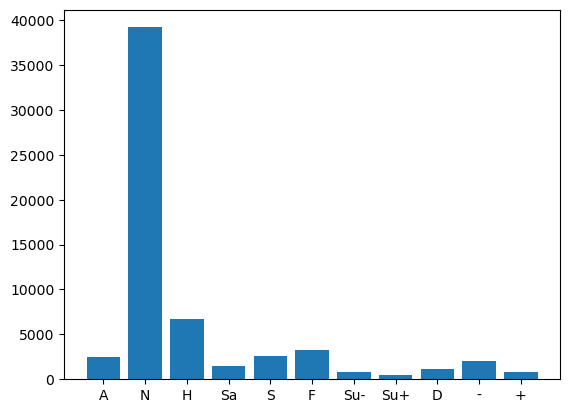

In [35]:
import matplotlib.pyplot as plt

plt.bar(emo_count.keys(), emo_count.values())

In [ ]:
f